In [136]:
import pandas as pd
import json

file_good = 'data/dataset_good.json'
file_nsgood = 'data/dataset_notsogood.json'
dict_good = json.loads(open(file_good).read())
dict_nsgood = json.loads(open(file_nsgood).read())

# dict_good[list(dict_good.keys())[0]]

In [115]:
article_id,info = list(dict_good.items())[0]
info['unique_contributors']

{'anoncontributors': 298,
 'contributors': [{'userid': 76, 'name': 'The Anome'},
  {'userid': 246, 'name': 'Awaterl'},
  {'userid': 823, 'name': 'Arvindn'},
  {'userid': 901, 'name': 'Aldie'},
  {'userid': 1591, 'name': 'SimonP'},
  {'userid': 2175, 'name': 'Maury Markowitz'},
  {'userid': 2954, 'name': 'Heron'},
  {'userid': 4392, 'name': 'RTC'},
  {'userid': 4626, 'name': 'Michael Hardy'},
  {'userid': 5771, 'name': 'Nixdorf'}]}

In [137]:
# process our data further

def proc(data_set):
    import helper

    _no_bot = lambda d: not helper.is_bot_user(d['name'], d['userid'])

    for article_id,info in data_set.items():

        # extract and flatten the contributor related data
        info['n_contributors_anon'] = info['unique_contributors']['anoncontributors']
        info['n_contributors'] = len(info['unique_contributors']['contributors'])
        info['n_contributors_nonbot'] = len(list(filter(_no_bot, info['unique_contributors']['contributors'])))
        del info['unique_contributors']

        # extract the revision data
        overall_revision_time = []
        overall_revision_time_nonbot = []
        info['user_revision_time'] = {}
        for uid, revs in info['revision_info'].items():
            ts_list = [pd.Timestamp(r['timestamp']) for r in revs]
            info['user_revision_time'][uid] = pd.Series(ts_list).sort_values()
            overall_revision_time += ts_list
            if revs[0].get('user') and not helper.is_bot_user(revs[0]['user'], uid):
                # this user is not a bot
                overall_revision_time_nonbot += ts_list

        # overall time series
        info['overall_revision_time'] = pd.Series(overall_revision_time).sort_values()
        info['overall_revision_time_nonbot'] = pd.Series(overall_revision_time_nonbot).sort_values()

        # clean up a little bit
        del info['revision_info']
    
proc(dict_good)
proc(dict_nsgood)

# article_id, info = list(dict_good.items())[0]
# info

In [138]:
df_good = pd.DataFrame.from_dict(dict_good, orient='index')
df_nsgood = pd.DataFrame.from_dict(dict_nsgood, orient='index')

df_good.head()

,article_id,grade,n_talk_post,n_editor_post,n_contributors_anon,n_contributors,n_contributors_nonbot,user_revision_time,overall_revision_time,overall_revision_time_nonbot
4chan,4chan,FA,7,1425,888.0,10,10,"{'27015025': [2018-07-16 08:10:15+00:00, 2018-...",1704 2004-05-09 13:00:38+00:00 1703 2004-0...,1586 2004-05-09 13:00:38+00:00 1585 2004-0...
AACS encryption key controversy,AACS encryption key controversy,GA,5,202,84.0,10,10,"{'27015025': [2016-09-30 23:38:00+00:00, 2017-...",843 2007-05-02 11:16:51+00:00 842 2007-05-...,798 2007-05-02 11:16:51+00:00 797 2007-05-...
AVG PC TuneUp,AVG PC TuneUp,GA,6,21,47.0,10,9,"{'27015025': [2018-09-28 17:38:49+00:00, 2018-...",291 2009-11-07 07:26:45+00:00 293 2009-11-...,267 2009-11-07 07:26:45+00:00 269 2009-11-...
Acid2,Acid2,FA,43,129,285.0,10,10,"{'9748448': [2018-08-25 18:04:53+00:00], '6959...",949 2005-04-15 04:56:16+00:00 870 2005-04-...,905 2005-04-15 04:56:16+00:00 828 2005-04-...
Alan Kotok,Alan Kotok,GA,8,24,12.0,10,10,"{'1403682': [2018-11-10 20:34:40+00:00], '7536...",816 2006-05-31 20:15:36+00:00 1027 2006-0...,812 2006-05-31 20:15:36+00:00 984 2006-05-...


In [139]:
df_good.loc['4chan']['overall_revision_time']

1704   2004-05-09 13:00:38+00:00
1703   2004-05-10 23:42:59+00:00
1702   2004-06-01 12:36:54+00:00
4885   2004-06-01 13:23:18+00:00
4884   2004-06-01 13:26:43+00:00
4883   2004-06-01 13:32:39+00:00
4882   2004-06-01 13:43:29+00:00
4889   2004-06-06 13:57:49+00:00
4888   2004-06-08 06:28:22+00:00
4887   2004-06-08 06:29:59+00:00
4886   2004-06-08 19:00:57+00:00
4881   2004-06-08 21:41:49+00:00
4880   2004-06-08 21:43:17+00:00
4879   2004-06-08 21:48:36+00:00
4878   2004-06-08 21:53:54+00:00
4877   2004-06-09 08:38:46+00:00
4875   2004-06-11 02:52:02+00:00
1287   2004-06-18 11:49:45+00:00
4876   2004-06-20 11:46:23+00:00
4874   2004-06-21 18:11:26+00:00
1286   2004-06-22 05:35:32+00:00
1285   2004-06-22 05:36:14+00:00
4873   2004-06-25 16:47:27+00:00
4872   2004-06-27 23:53:49+00:00
4871   2004-06-28 00:05:56+00:00
4870   2004-07-11 09:56:08+00:00
4869   2004-07-14 23:49:30+00:00
4868   2004-07-14 23:49:51+00:00
4867   2004-07-17 03:18:24+00:00
4866   2004-08-05 20:18:57+00:00
          

In [140]:
df_good.loc['4chan']['user_revision_time']['669117']

28   2010-12-26 19:48:26+00:00
27   2010-12-29 08:05:50+00:00
26   2010-12-29 17:34:48+00:00
25   2011-04-12 07:43:51+00:00
24   2013-10-02 08:29:02+00:00
23   2014-09-04 05:55:59+00:00
22   2014-09-04 06:23:47+00:00
21   2014-09-04 18:45:31+00:00
20   2014-09-05 18:26:37+00:00
19   2014-09-20 06:26:50+00:00
18   2014-10-11 14:31:34+00:00
17   2015-07-18 05:25:16+00:00
16   2015-10-02 06:22:22+00:00
15   2015-11-01 07:38:55+00:00
14   2015-12-05 09:06:43+00:00
13   2016-02-07 05:25:53+00:00
12   2016-02-15 06:28:39+00:00
11   2016-03-06 01:51:24+00:00
10   2016-10-05 05:06:20+00:00
9    2017-02-07 04:48:04+00:00
8    2017-03-24 14:32:43+00:00
7    2017-04-27 07:22:48+00:00
6    2017-07-16 10:10:35+00:00
5    2017-11-10 06:41:39+00:00
4    2018-01-02 06:39:52+00:00
3    2018-01-02 18:31:17+00:00
2    2018-06-19 05:34:44+00:00
1    2018-08-04 05:30:48+00:00
0    2018-11-07 12:36:05+00:00
dtype: datetime64[ns, UTC]

In [141]:
df_good.describe()

,n_talk_post,n_editor_post,n_contributors_anon,n_contributors,n_contributors_nonbot
count,150.000000,150.000000,148.000000,150.0,150.000000
mean,10.406667,98.066667,306.513514,10.0,9.773333
std,10.408500,203.145720,482.327682,0.0,0.592420
min,0.000000,5.000000,1.000000,10.0,6.000000
25%,4.000000,16.000000,20.750000,10.0,10.000000
50%,6.000000,36.000000,100.000000,10.0,10.000000
75%,12.750000,87.750000,340.000000,10.0,10.000000
max,48.000000,1425.000000,2544.000000,10.0,10.000000


In [125]:
df_nsgood.describe()

,n_talk_post,n_editor_post,n_contributors_anon,n_contributors,n_contributors_nonbot
count,247.000000,247.000000,243.000000,247.000000,247.000000
mean,13.838057,88.275304,514.374486,9.971660,9.878543
std,11.590493,143.172352,599.856956,0.261341,0.495329
min,0.000000,1.000000,1.000000,7.000000,6.000000
25%,6.000000,22.500000,113.500000,10.000000,10.000000
50%,9.000000,56.000000,269.000000,10.000000,10.000000
75%,21.000000,95.500000,678.000000,10.000000,10.000000
max,58.000000,1654.000000,2810.000000,10.000000,10.000000


count                      4889
mean     1 days 02:00:48.993659
std      3 days 11:37:34.044611
min             0 days 00:00:00
25%             0 days 00:04:11
50%             0 days 01:39:09
75%             0 days 17:01:37
max            82 days 01:41:53
dtype: object

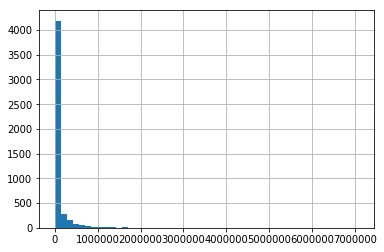

In [153]:
f = df_good.loc['4chan']['overall_revision_time']

f.diff().astype('timedelta64[s]').hist(bins=50)
f.diff().describe()

count                          28
mean     102 days 14:18:50.678571
std      178 days 22:11:47.488474
min               0 days 00:27:48
25%       12 days 21:15:51.250000
50%       45 days 16:50:21.500000
75%      106 days 21:44:33.250000
max             904 days 00:45:11
dtype: object

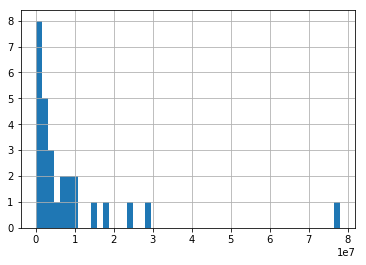

In [168]:
f = df_good.loc['4chan']['user_revision_time']['669117']

f.diff().astype('timedelta64[s]').hist(bins=50)
f.diff().describe()

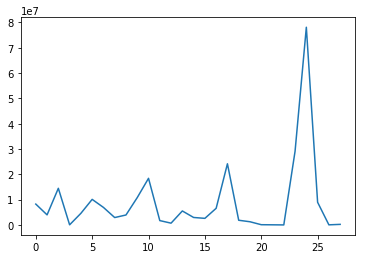

In [169]:
f.diff().astype('timedelta64[s]').plot()

In [130]:
# It maybe interesting to stats the mean/std/min value of all users